In [1]:
import tensorflow as tf
try:
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

g:\ayame\car-damage\car-damage-detector\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
g:\ayame\car-damage\car-damage-detector\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
g:\ayame\car-damage\car-damage-detector\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
g:\ayame\car-damage\car-damage-detector\venv\l

In [14]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers
import keras

Using TensorFlow backend.


In [13]:
base_dir = "./dataset/final"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

train_bumper_dent_dir = os.path.join(train_dir, 'bumper_dent')
print ('Total training bumper_dent images:', len(os.listdir(train_bumper_dent_dir)))

train_bumper_scratch_dir = os.path.join(train_dir, 'bumper_scratch')
print ('Total training bumper_scratch images:', len(os.listdir(train_bumper_scratch_dir)))

train_door_dent_dir = os.path.join(train_dir, 'door_dent')
print ('Total training door_dent images:', len(os.listdir(train_door_dent_dir)))

train_door_scratch_dir = os.path.join(train_dir, 'door_scratch')
print ('Total training door_scratch images:', len(os.listdir(train_door_scratch_dir)))

train_glass_shatter_dir = os.path.join(train_dir, 'glass_shatter')
print ('Total training glass_shatter images:', len(os.listdir(train_glass_shatter_dir)))

train_head_lamp_dir = os.path.join(train_dir, 'head_lamp')
print ('Total training head_lamp images:', len(os.listdir(train_head_lamp_dir)))

train_tail_lamp_dir = os.path.join(train_dir, 'tail_lamp')
print ('Total training tail_lamp images:', len(os.listdir(train_tail_lamp_dir)))


# Valid
valid_bumper_dent_dir = os.path.join(validation_dir, 'bumper_dent')
print ('Total validation bumper_dent images:', len(os.listdir(train_bumper_dent_dir)))

valid_bumper_scratch_dir = os.path.join(validation_dir, 'bumper_scratch')
print ('Total validation bumper_scratch images:', len(os.listdir(train_bumper_scratch_dir)))

valid_door_dent_dir = os.path.join(validation_dir, 'door_dent')
print ('Total validation door_dent images:', len(os.listdir(train_door_dent_dir)))

valid_door_scratch_dir = os.path.join(validation_dir, 'door_scratch')
print ('Total validation door_scratch images:', len(os.listdir(train_door_scratch_dir)))

valid_glass_shatter_dir = os.path.join(validation_dir, 'glass_shatter')
print ('Total validation glass_shatter images:', len(os.listdir(train_glass_shatter_dir)))

valid_head_lamp_dir = os.path.join(validation_dir, 'head_lamp')
print ('Total validation head_lamp images:', len(os.listdir(train_head_lamp_dir)))

valid_tail_lamp_dir = os.path.join(validation_dir, 'tail_lamp')
print ('Total validation tail_lamp images:', len(os.listdir(train_tail_lamp_dir)))


Total training bumper_dent images: 110
Total training bumper_scratch images: 66
Total training door_dent images: 176
Total training door_scratch images: 144
Total training glass_shatter images: 132
Total training head_lamp images: 123
Total training tail_lamp images: 132
Total validation bumper_dent images: 110
Total validation bumper_scratch images: 66
Total validation door_dent images: 176
Total validation door_scratch images: 144
Total validation glass_shatter images: 132
Total validation head_lamp images: 123
Total validation tail_lamp images: 132


In [17]:
image_size = 224 # All images will be resized to 160x160
batch_size = 32

# Rescale all images by 1./255 and apply image augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                train_dir,  # Source directory for the training images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                # Since we use binary_crossentropy loss, we need binary labels
                class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                validation_dir, # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')

Found 883 images belonging to 7 classes.
Found 80 images belonging to 7 classes.


In [18]:
IMG_SHAPE = (image_size, image_size, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
9412608/9406464 [==============================] - 8s 1us/step


In [19]:
base_model.trainable = False

In [20]:
# Let's take a look at the base model architecture
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalizationV1) (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [23]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(7, activation='softmax')
])

In [34]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 8967      
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________


In [36]:
len(model.trainable_variables)

2

In [37]:
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator,
                              # steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_generator)
                              # validation_steps=validation_steps)

Epoch 1/10
28/28 [==============================] - 41s 1s/step - loss: 2.0421 - acc: 0.1653 - val_loss: 2.0782 - val_acc: 0.1625
Epoch 2/10
28/28 [==============================] - 36s 1s/step - loss: 1.9242 - acc: 0.2163 - val_loss: 1.9619 - val_acc: 0.2000
Epoch 3/10
28/28 [==============================] - 36s 1s/step - loss: 1.8214 - acc: 0.2661 - val_loss: 1.9051 - val_acc: 0.2375
Epoch 4/10
28/28 [==============================] - 36s 1s/step - loss: 1.7455 - acc: 0.3250 - val_loss: 1.8125 - val_acc: 0.2750
Epoch 5/10
28/28 [==============================] - 36s 1s/step - loss: 1.6599 - acc: 0.3817 - val_loss: 1.7569 - val_acc: 0.3000
Epoch 6/10
28/28 [==============================] - 36s 1s/step - loss: 1.5887 - acc: 0.4190 - val_loss: 1.6957 - val_acc: 0.3375
Epoch 7/10
28/28 [==============================] - 37s 1s/step - loss: 1.5213 - acc: 0.4417 - val_loss: 1.6802 - val_acc: 0.3750
Epoch 8/10
28/28 [==============================] - 36s 1s/step - loss: 1.4770 - acc: 0.48

In [38]:
# save the model

model.save('v1.h5')

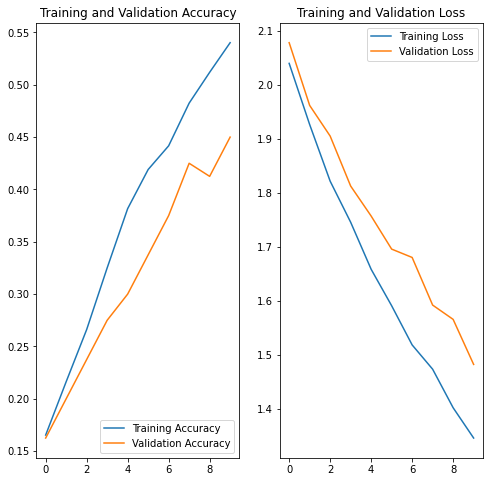

In [41]:

# visualize the result (acc, val_acc, loss, val_loss)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:
# load the trained model into the code

from tensorflow import keras
import tensorflow as tf
tf.enable_eager_execution()

model_inference = keras.models.load_model("v1.h5")
model_inference.summary()

g:\ayame\car-damage\car-damage-detector\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
g:\ayame\car-damage\car-damage-detector\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
g:\ayame\car-damage\car-damage-detector\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
g:\ayame\car-damage\car-damage-detector\venv\l

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 8967      
Total params: 2,266,951
Trainable params: 2,232,839
Non-trainable params: 34,112
_________________________________________________________________


In [2]:
# define the class name
class_dict = {0:"bumper_dent", 1:"bumper_scratch", 2:"door_dent", 3:"door_scratch", 4:"glass_shatter", 5:"head_lamp", 6:"tail_lamp"}

In [4]:
# do prediction

from PIL import Image
import numpy as np
from tensorflow import keras
import time

start_time = time.time()
model_inference = keras.models.load_model("v1.h5")
# Your TestImage Path
image_path = "./dataset/final/valid/tail_lamp/1482.jpeg"
im = Image.open(image_path)
im1 = im.resize((224,224))
im1 = np.expand_dims(im1, axis=0)

y_pred = model_inference.predict(im1)
prediction = tf.argmax(y_pred, axis=1, output_type=tf.int32).numpy()[0]
prediction_label = class_dict[prediction.item()]

test_accuracy = tf.keras.metrics.Accuracy()
top3_idx = y_pred.argsort()[-3:]
top1 = top3_idx[0][2]

end_time = time.time()
inference_time = end_time-start_time

print("Image Path ", image_path)
print("Top 1 prediction is class {top1} ({prediction_label})".format(top1=top1,prediction_label=prediction_label))
print("The accuracy of top 1 prediction is ", y_pred[0][top1])
print("Prediction: ", y_pred[0])
print("Inference time is {0:.2f} second(s)".format(inference_time))

Image Path  ./dataset/final/valid/tail_lamp/1482.jpeg
Top 1 prediction is class 0 (tail_lamp)
The accuracy of top 1 prediction is  0.1007404
Prediction:  [0.1007404  0.0259     0.12410504 0.11265276 0.23885942 0.02907242
 0.36866996]
Inference time is 13.63 second(s)
